In [183]:
import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Let's now get to modelling! We will be trying 3 models: 
- Logistic Regression - 
- Decision Tree Classifier - 
- Histogram Gradient Boosting Classifier - 

Let's look at our data now:

In [184]:
df= pd.read_csv('Data/modelling_df.csv',index_col=0)

In [185]:
df.shape

(269906, 26)

In [186]:
df

,Climate ID,geometry_x,YEAR,MONTH,fire_index,distance,geometry_y,Longitude (x),Latitude (y),Year,...,TS 1 month prior,TP 1 month prior,MT 2 month prior,TS 2 month prior,TP 2 month prior,MT 3 month prior,TS 3 month prior,TP 3 month prior,geometry,Fire
0,1012055,NaN,1990,1,NaN,NaN,NaN,-124.05,48.83,1990.0,...,3.035714,10.107143,6.267742,0.774194,5.070968,10.38,0.0,2.713333,POINT (-124.05 48.83),0
1,1012710,NaN,1990,1,NaN,NaN,NaN,-123.44,48.43,1990.0,...,0.875000,5.753571,NaN,0.045161,1.322581,NaN,0.0,1.700000,POINT (-123.44 48.43),0
2,1015105,NaN,1990,1,NaN,NaN,NaN,-123.56,48.37,1990.0,...,1.589286,7.600000,NaN,0.064516,1.432258,NaN,0.0,1.796667,POINT (-123.56 48.37),0
3,1015628,NaN,1990,1,NaN,NaN,NaN,-123.72,48.82,1990.0,...,0.657143,4.167857,NaN,0.064516,2.551613,NaN,0.0,2.693333,POINT (-123.72 48.82),0
4,1015638,NaN,1990,1,NaN,NaN,NaN,-123.29,48.76,1990.0,...,0.553571,2.671429,NaN,0.000000,1.780645,NaN,0.0,2.420000,POINT (-123.29 48.76),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269901,8402520,NaN,2022,12,NaN,NaN,NaN,-55.67,49.92,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-55.67 49.92),0
269902,8402544,NaN,2022,12,NaN,NaN,NaN,-53.90,48.35,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-53.9 48.35),0
269903,8501900,NaN,2022,12,NaN,NaN,NaN,-60.42,53.32,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-60.42 53.32),0
269904,8502400,NaN,2022,12,NaN,NaN,NaN,-60.22,55.45,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-60.22 55.45),0


Let's clean up the data to get it ready for modelling. We will be dropping the following columns: 
- geometry - we don't need to know where the fire is located, just that a fire has occurred.
- Climate ID - We don't need to know the Station ID.
- geometry_x - we don't need to know where the fire is located, just that a fire has occurred.
- geometry_y - we don't need to know where the fire is located, just that a fire has occurred.
- fire_index - we don't need to know the index of the fire data.
- distance- we don't need the distance anymore.
- Date - We already have the YEAR and MONTH Column, so we don't need the date. 
- Year - We already have a column for year in `YEAR` and it is more complete.
- Month - We already have a column for month in `MONTH` and it is more complete.

In [187]:
df.drop(columns=['geometry','Climate ID','geometry_x','geometry_y','fire_index','distance','Date','Year','Month'],inplace=True)

In [242]:
df.head()

,index,YEAR,MONTH,Longitude (x),Latitude (y),Mean Temp (°C),Total Snow (cm),Total Precip (mm),MT 1 month prior,TS 1 month prior,TP 1 month prior,MT 2 month prior,TS 2 month prior,TP 2 month prior,MT 3 month prior,TS 3 month prior,TP 3 month prior,Fire
0,0,1990,1,-124.05,48.83,3.665517,1.225806,11.906452,1.828571,3.035714,10.107143,6.267742,0.774194,5.070968,10.38,0.0,2.713333,0
1,1,1990,1,-123.44,48.43,NaN,0.032258,6.870968,NaN,0.875000,5.753571,NaN,0.045161,1.322581,NaN,0.0,1.700000,0
2,2,1990,1,-123.56,48.37,NaN,0.064516,7.245161,NaN,1.589286,7.600000,NaN,0.064516,1.432258,NaN,0.0,1.796667,0
3,3,1990,1,-123.72,48.82,NaN,0.596774,7.180645,NaN,0.657143,4.167857,NaN,0.064516,2.551613,NaN,0.0,2.693333,0
4,4,1990,1,-123.29,48.76,NaN,0.225806,5.103226,NaN,0.553571,2.671429,NaN,0.000000,1.780645,NaN,0.0,2.420000,0


Let's now look at the ratio of missing data per column and see what comes up:

In [243]:
for i in range(len(df.columns)):
    na_index=df.isna().sum().index[i]
    na_ratio=df.isna().sum().iloc[i]
    print(f'{na_index} has {round((na_ratio/df.shape[0])*100,2)}% missing data')

index has 0.0% missing data
YEAR has 0.0% missing data
MONTH has 0.0% missing data
Longitude (x) has 2.8% missing data
Latitude (y) has 2.8% missing data
Mean Temp (°C) has 13.04% missing data
Total Snow (cm) has 19.88% missing data
Total Precip (mm) has 6.52% missing data
MT 1 month prior has 13.22% missing data
TS 1 month prior has 20.07% missing data
TP 1 month prior has 6.61% missing data
MT 2 month prior has 13.39% missing data
TS 2 month prior has 20.24% missing data
TP 2 month prior has 6.84% missing data
MT 3 month prior has 13.51% missing data
TS 3 month prior has 20.43% missing data
TP 3 month prior has 7.34% missing data
Fire has 0.0% missing data


Now let's separate the X and y variables:

In [203]:
df.reset_index(inplace=True)

In [244]:
X = df.loc[:,df.columns != 'Fire']


In [245]:
X

,index,YEAR,MONTH,Longitude (x),Latitude (y),Mean Temp (°C),Total Snow (cm),Total Precip (mm),MT 1 month prior,TS 1 month prior,TP 1 month prior,MT 2 month prior,TS 2 month prior,TP 2 month prior,MT 3 month prior,TS 3 month prior,TP 3 month prior
0,0,1990,1,-124.05,48.83,3.665517,1.225806,11.906452,1.828571,3.035714,10.107143,6.267742,0.774194,5.070968,10.38,0.0,2.713333
1,1,1990,1,-123.44,48.43,NaN,0.032258,6.870968,NaN,0.875000,5.753571,NaN,0.045161,1.322581,NaN,0.0,1.700000
2,2,1990,1,-123.56,48.37,NaN,0.064516,7.245161,NaN,1.589286,7.600000,NaN,0.064516,1.432258,NaN,0.0,1.796667
3,3,1990,1,-123.72,48.82,NaN,0.596774,7.180645,NaN,0.657143,4.167857,NaN,0.064516,2.551613,NaN,0.0,2.693333
4,4,1990,1,-123.29,48.76,NaN,0.225806,5.103226,NaN,0.553571,2.671429,NaN,0.000000,1.780645,NaN,0.0,2.420000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269901,269901,2022,12,-55.67,49.92,-2.470968,NaN,2.677419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269902,269902,2022,12,-53.90,48.35,0.413793,0.137931,4.482759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269903,269903,2022,12,-60.42,53.32,-7.009677,0.593548,0.580645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269904,269904,2022,12,-60.22,55.45,-4.612000,NaN,2.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
X.drop(columns=['index'],inplace=True)

/var/folders/g4/w2hwfpc1681072qk9l2n84600000gn/T/ipykernel_19418/3730768452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['index'],inplace=True)


In [248]:
y=df.loc[:,'Fire']

### Using Logistic Regression for modelling

For logistic regression to work, we will need to do something about our null values. Since the null values are spread across different features, we'll simply just use the `fillna()` function that comes with pandas. We will be backfilling and frontfilling which will use both the next valid observation and previous observation to fil the gap.

In [249]:
X_filled= X.fillna(method='bfill')

/var/folders/g4/w2hwfpc1681072qk9l2n84600000gn/T/ipykernel_19418/3675650266.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_filled= X.fillna(method='bfill')


In [250]:
X_filled= X.fillna(method='ffill')

/var/folders/g4/w2hwfpc1681072qk9l2n84600000gn/T/ipykernel_19418/1625951408.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_filled= X.fillna(method='ffill')


In [251]:
X_filled.isna().sum()

YEAR                 0
MONTH                0
Longitude (x)        0
Latitude (y)         0
Mean Temp (°C)       0
Total Snow (cm)      0
Total Precip (mm)    0
MT 1 month prior     0
TS 1 month prior     0
TP 1 month prior     0
MT 2 month prior     0
TS 2 month prior     0
TP 2 month prior     0
MT 3 month prior     0
TS 3 month prior     0
TP 3 month prior     0
dtype: int64

Perfect, looks like we imputed all the missing data. Let's see if our logistic regression will be able to predict fires. Let's split our train/test sets.

In [253]:
X_train_logit, X_test_logit, y_train_logit, y_test_logit = train_test_split(X_filled, y, test_size=0.2, random_state=50)


Let's scale our Train data now before running the logistic regression

In [254]:
from sklearn.preprocessing import StandardScaler


In [255]:
scaler=StandardScaler()
scaler=scaler.fit(X_train_logit)
X_train_ss=scaler.transform(X_train_logit)

In [256]:
X_train_ss_logit=pd.DataFrame(X_train_ss,columns=X_train_logit.columns)

Let's start our logistic regression now: 

In [257]:
logreg= LogisticRegression()
logit=logreg.fit(X_train_ss_logit,y_train_logit)

Let's look at the train score for our logistic regression now: 

In [258]:
logit.score(X_train_ss_logit,y_train_logit)

0.8347613049035771

In [259]:
X_test_ss= scaler.transform(X_test_logit)

In [260]:
X_test_ss_logit=pd.DataFrame(X_test_ss,columns=X_test_logit.columns)

And let's look out our test score:

In [261]:
logit.score(X_test_ss_logit,y_test_logit)

0.8368345003890185

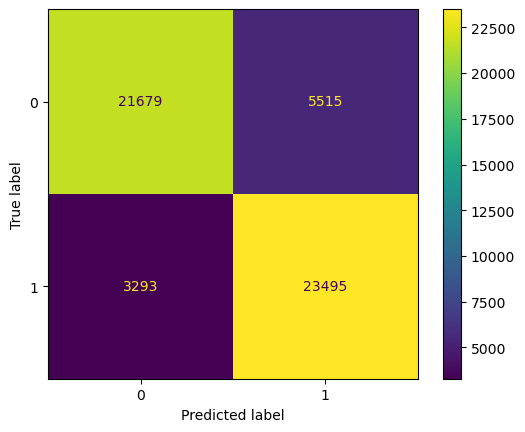

In [263]:
ConfusionMatrixDisplay.from_estimator(logit,X_test_ss_logit,y_test_logit)

In [264]:
coef_df = pd.DataFrame(logit.coef_ ,columns=X.columns)

In [265]:
coef_df.head()

,YEAR,MONTH,Longitude (x),Latitude (y),Mean Temp (°C),Total Snow (cm),Total Precip (mm),MT 1 month prior,TS 1 month prior,TP 1 month prior,MT 2 month prior,TS 2 month prior,TP 2 month prior,MT 3 month prior,TS 3 month prior,TP 3 month prior
0,0.394077,0.011568,-0.626418,0.060766,1.14302,-0.128344,-0.425583,0.671183,0.049549,-0.048065,0.895108,0.01405,-0.201349,-0.310058,-0.012336,-0.420161


#### Conclusion

It looks like our logistic regression gave us a score of 83% for both train and test, which is not terrible. We can see from our confusion matrix that it did a decent job at predicting both positive and negative occurances of fires. Let's see if we can increase the precision with other models. 

### Using Decision Tree Classifier for modelling

Let's now take a look at a decision tree model to see if we would get better results. We'll use the `X_filled` variables from above since we need to impute the missing values. 

In [266]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_filled, y, test_size=0.2, random_state=42)

In [267]:
dt=DecisionTreeClassifier()

In [268]:
dt.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier()

In [269]:
print(f"The TRAIN classification accuracy is:  {dt.score(X_train_dt,y_train_dt)}")
print(f"The TEST classification accuracy is:  {dt.score(X_test_dt,y_test_dt)}")

The TRAIN classification accuracy is:  0.9981243400455716
The TEST classification accuracy is:  0.9611722425993849


This looks very much like an overfitted model, let's see how we can make it more generalized. We'll be running a loop to see the ideal depth that our model needs. First, we'll need to reset our train/test to avoid data leakage:

In [271]:
X_train_dt2, X_test_dt2, y_train_dt2, y_test_dt2 = train_test_split(X_filled, y, test_size=0.2, random_state=24)

In [276]:
train_acc = []
test_acc = []

for depth in range(1,11):
    
    dt_model = DecisionTreeClassifier(max_depth=depth)
    
    dt_model.fit(X_train_dt2, y_train_dt2)
    
    train_acc.append(dt_model.score(X_train_dt2, y_train_dt2))
    test_acc.append(dt_model.score(X_test_dt2, y_test_dt2))
    
    
    print(f'Max depth: {depth}---train acc {train_acc[depth-1]}---test acc {test_acc[depth-1]}')

Max depth: 1---train acc 0.7901159667290343---test acc 0.7902819458337964
Max depth: 2---train acc 0.8424445638280136---test acc 0.8415582972101812
Max depth: 3---train acc 0.8604277430947926---test acc 0.8613241450853988
Max depth: 4---train acc 0.8808886460050759---test acc 0.8811085176540329
Max depth: 5---train acc 0.9036512847112873---test acc 0.9034678226075359
Max depth: 6---train acc 0.9104684981752839---test acc 0.9107480271201511
Max depth: 7---train acc 0.920726737185306---test acc 0.9195843058797377
Max depth: 8---train acc 0.9295955984513069---test acc 0.9290874736023119
Max depth: 9---train acc 0.9355560289731573---test acc 0.933440776555148
Max depth: 10---train acc 0.9413080528334044---test acc 0.938071949909229


Let's now plot the results:

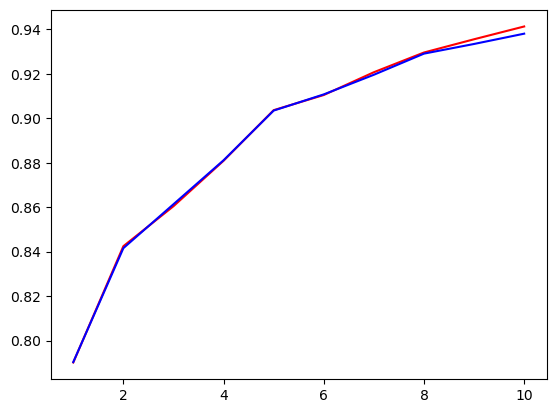

In [277]:
plt.figure()

plt.plot(range(1,11), train_acc, label = 'train', c = 'r')
plt.plot(range(1,11), test_acc, label = 'test', c = 'b')

plt.show()

Based on the results above, we're willing to accept that a max depth of 9 is ideal. We're accepting it because both the train and test scores are very close to one another at 0.9355560289731573 for train and 0.933440776555148 for test. Let's try it again and take a look at the decision tree:

In [278]:
X_train_dt3, X_test_dt3, y_train_dt3, y_test_dt3 = train_test_split(X_filled, y, test_size=0.2, random_state=10)

In [281]:
dt_final=DecisionTreeClassifier(max_depth=9)
dt_final.fit(X_train_dt3,y_train_dt3)

DecisionTreeClassifier(max_depth=9)

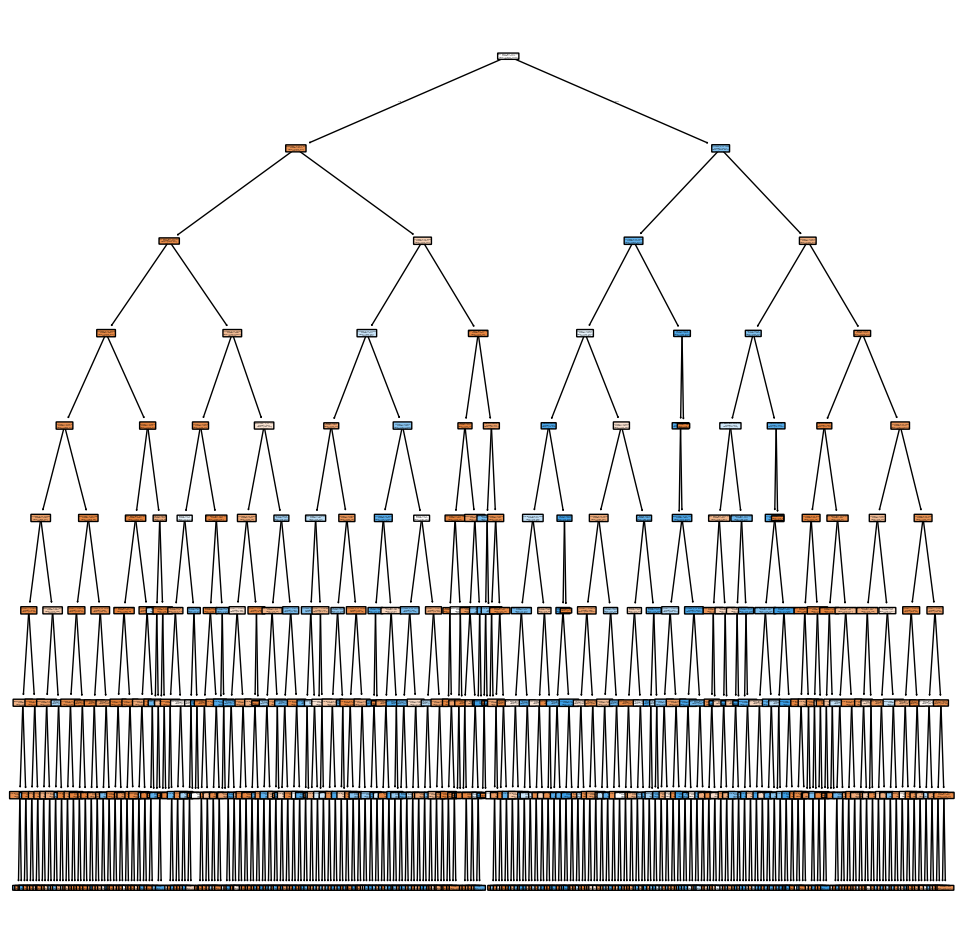

In [282]:
plt.figure(figsize=(12,12))
plot_tree(dt_final, 
          feature_names=list(X_filled.columns), 
          class_names=['Fire','No Fire'],
          rounded=True,
          impurity=False,
          filled=True, )
plt.show()

We can see that since we have we have a depth of 9 it's become hard to read the charts. Let's look at the confusion matrix instead

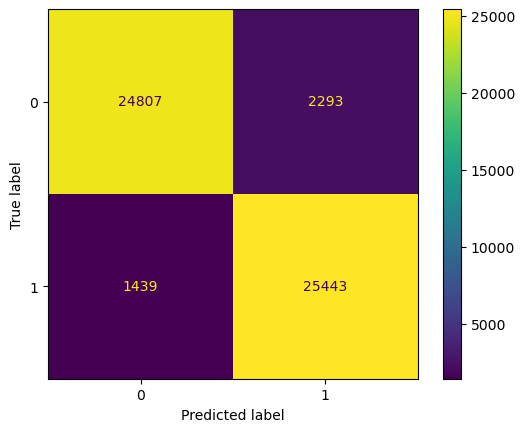

In [284]:
ConfusionMatrixDisplay.from_estimator(dt_final,X_test_dt3,y_test_dt3)

#### Conclusion 

A Decision tree classifier gave us a decent result of 93%. The risk of a high score like this is that model drift will be more likely to occur quicker as climate data is contineously changing, and extreme weather is more frequent. This high accuracy is contengient on the climate being the same as it was in the last 30 years, which is not necessarily the case today.

In [283]:
print(f"The TRAIN classification accuracy is:  {dt_final.score(X_train_dt3,y_train_dt3)}")
print(f"The TEST classification accuracy is:  {dt_final.score(X_test_dt3,y_test_dt3)}")

The TRAIN classification accuracy is:  0.9351531094273912
The TEST classification accuracy is:  0.930865844170279


### Using Histogram Gradient Boosting Classifier for modelling

I chose HistGradientBoostingClassifier for my first model because there are a lot of null values within my dataset that have not been imputed. The null values exist naturally in my dataset, as in even with new data there will be some metrics that get missed. I'll try to impute the missing information in my next model, where I will try a simple logistic regression. 

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
histboost=HistGradientBoostingClassifier()
histboost.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [287]:
histboost.score(X_train,y_train)


0.956447638984087

In [288]:
histboost.score(X_test,y_test)


0.9551146678522471

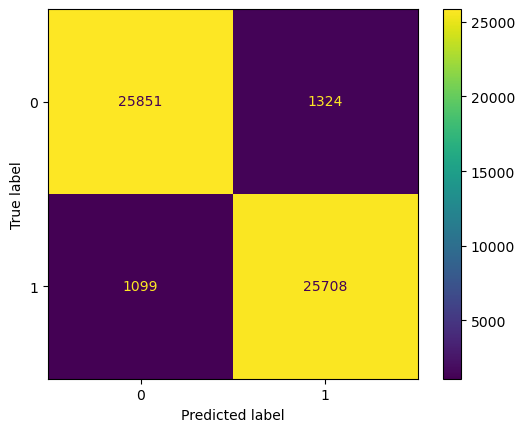

In [293]:
ConfusionMatrixDisplay.from_estimator(histboost,X_test,y_test)

#### Conculsion

The histogram Gradient Booster model is the model that gave us the best score, with a train score of 95.64% and a test score of 95.51%. I will be using this model as the main model of my capstone.

